# Using a dataset of cars properties to make predictions using Linear Regression and K-neighbors methods with skLearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import math
import numpy as np

In [ ]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/BriceNW/UE_AAA/main/CarPrice_Assignment.csv')
df_cars.head()

In [ ]:
#Visualizing the correlation between values
df_cars_corr = df_cars.corr()
plt.figure()
sns.heatmap(df_cars_corr, annot=True)

In [ ]:
df_cars_corr=df_cars_corr.loc[['price'],:].drop(['price'],axis=1)

In [ ]:
#Keeping only the high correlation ones (corr >=0.5)
#Those of which corr <0.5 are replaced by Nan, we delete them
df_cars_corr = df_cars_corr[abs(df_cars_corr)>=0.5].dropna(axis=1)

In [ ]:
df_cars_corr.columns.tolist()

## Predicting the price of the car based on its engine's size

We chose the variables with the biggest correlation

In [ ]:
y = df_cars['price']
x = df_cars[['enginesize']] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.75)

In [ ]:
df_cars.shape
X_train.shape
X_test.shape

In [ ]:
#Using skLearn's Linear Regression to make predictions
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Scores of the model
print("score sur les données de train: ", model.score(X_train,y_train))
print("score sur les données de test: ", model.score(X_test,y_test))

score sur les données de train:  0.7522319851972108
score sur les données de test:  0.7952036346149267


In [ ]:
#Parameters of the model
print("params: a = ", model.coef_, " b = ", model.intercept_)

params: a =  [166.39928611]  b =  -7744.692431769732


In [ ]:
#Creating a column to differentiate train and test values
df_cars['train_test'] = None
df_cars.loc[X_train.index, 'train_test'] = 'train'
df_cars.loc[X_test.index, 'train_test'] = 'test'

In [ ]:
#Creating a column with the price predicted using the regression model
df_cars['Predicted_price'] = model.predict(df_cars[['enginesize']])

In [ ]:
df_cars.head()

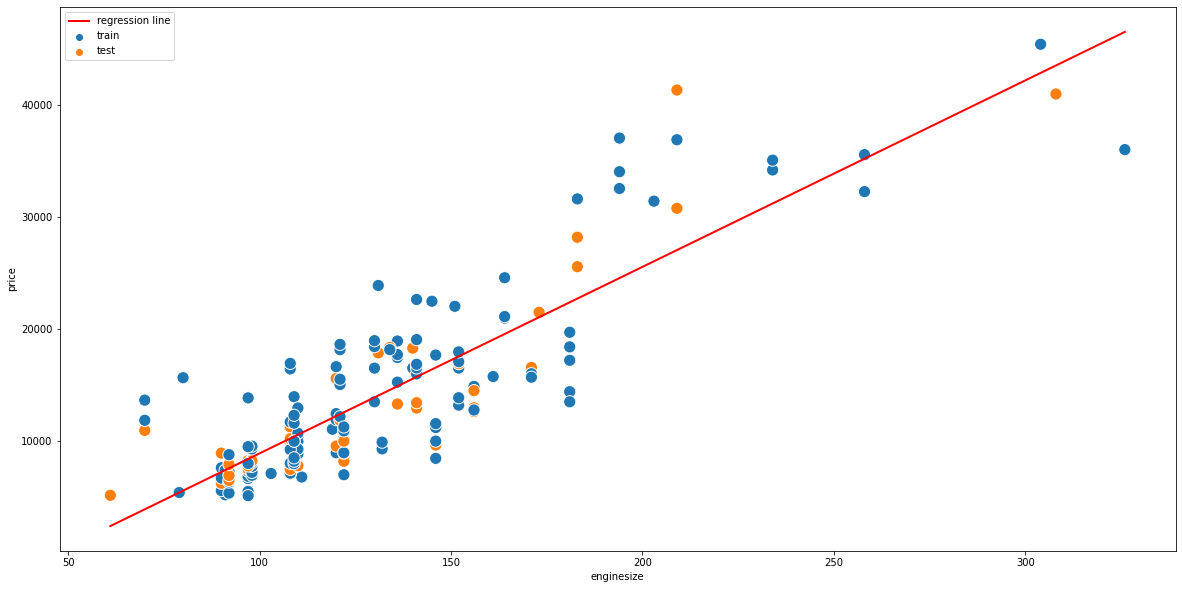

In [ ]:
#Visualizing the model
fig = plt.figure(figsize=(20,10))

sns.scatterplot(data=df_cars, x = df_cars['enginesize'], y = df_cars['price'], hue = df_cars['train_test'], s=150)
sns.lineplot(data=df_cars,x = df_cars['enginesize'], y = df_cars['Predicted_price'], color='red', label='regression line', linewidth=2.0)

In [ ]:
#Calculating the different metrics of the model to assess its performances
y_pred = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test,y_pred))
print('RMSE: ', mean_squared_error(y_test,y_pred))

MAE:  2667.454271487105
RMSE:  13856427.236958016


#Using the K-Neighbors method

##Preprocessing

In [ ]:
#Setting the scaler to normalize their values
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

#KNeighbors
We make predictions based on the neighbors of the variable observed (others variables sharing similar properties) and compute the mean of the value we want to predict

In [ ]:
#The neighbors are determined by a distance to the variable to predict using the euclidian distance
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=2) #metric de minkowski + p=2 : distance euclidienne
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
print("Score sur serie train: ", knn.score(x_train_scaled, y_train))
print("Score sur serie test: ", knn.score(x_test_scaled, y_test))

Score sur serie train:  0.9443392484060994
Score sur serie test:  0.8862526906389968


#Using th KN method to predict the price of the car based on its length, width and power

In [ ]:
x1 = [df_cars[['carlength']],df_cars[['carwidth']],df_cars[['horsepower']]]
X1_train, X1_test, y_train, y_test = train_test_split(x1, y, random_state=42, train_size=0.75)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X1_train)

StandardScaler()

In [ ]:
x1_train_scaled = scaler2.transform(X1_train)
x1_test_scaled = scaler2.transform(X1_test)

In [ ]:
knn2 = KNeighborsRegressor(n_neighbors=2, weights='distance', metric='minkowski', p=2)
knn.fit(x1_train_scaled,y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
print("Score sur serie train: ", knn.score(x1_train_scaled, y_train))
print("Score sur serie test: ", knn.score(x1_test_scaled, y_test))

Score sur serie train:  0.9847007678093266
Score sur serie test:  0.7712148154806144


In [ ]:
df_cars['Price_Categories']=df_cars['price'].apply(lambda x: 0 if x<=10000 else 1)
df_cars['Price_Categories'].value_counts()

1    105
0    100
Name: Price_Categories, dtype: int64

In [ ]:
numerics = ['int64', 'float64']

In [ ]:
y4 = df_cars['Price_Categories']
x4 = df_cars.select_dtypes(include=numerics).drop(['Price_Categories','price'], axis = 1)

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x4,y4, random_state=12, train_size=0.75, stratify=y)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_classifier.fit(x_train3, y_train3)
#pd.get_dummies: transforme les données non numériques (donc inutilisables ici) en données numériques


KNeighborsClassifier(weights='distance')

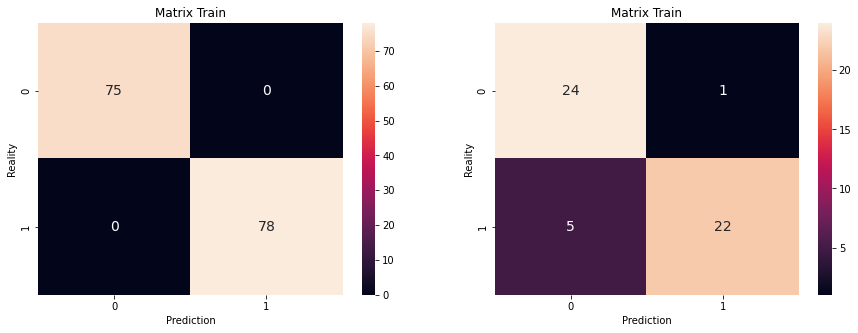

In [ ]:
y_train_pred = knn_classifier.predict(x_train3)
y_test_pred = knn_classifier.predict(x_test3)

matrix_train = confusion_matrix(y_train3, y_train_pred)
matrix_test = confusion_matrix(y_test3, y_test_pred)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))

ax1,ax2 = axes

sns.heatmap(matrix_train, annot=True, ax=ax1, fmt='d', annot_kws={'size':14})
ax1.set_xlabel('Prediction')
ax1.set_ylabel('Reality')
ax1.set_title('Matrix Train')
sns.heatmap(matrix_test, annot=True, ax=ax2, fmt='d', annot_kws={'size':14})
ax2.set_xlabel('Prediction')
ax2.set_ylabel('Reality')
ax2.set_title('Matrix Train')

plt.show()